In [8]:
import pandas as pd

import pandas_datareader.data as web
import quandl

import json
from datetime import datetime as dt

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Analyzing returns

## Define helper functions

In [2]:
# Define periods
def periods(start, end):
    start = start.split('-')
    end   = end.split('-')
    return dt(int(start[0]), int(start[1]), int(start[2])), dt(int(end[0]), int(end[1]), int(end[2]))

In [3]:
def plot_series(series, labels = None, title = None, lw = 1, alpha = .7):
    
    if type(series) != list:
        
        plt.figure(figsize = (15, 6))
        plt.plot(series, label = labels, lw = lw)
        plt.legend()
        plt.title(title)
        plt.xticks(rotation = 45)
        plt.plot()
    
    else:
        
        plt.figure(figsize = (15, 6))
        
        if type(labels) != list:
            labels = [x for x in range(len(series))]
            
        for serie, label in zip(series, labels):
            
            plt.plot(serie, label = label, alpha = alpha, lw = lw)
        
        plt.xticks(rotation = 45)
        plt.legend()
        plt.title(title)
        plt.plot()

## Get data

In [13]:
# Get API key for Quandl
with open('quandl_api.json', 'r') as f:
    api_key = json.load(f)
    
api_key = api_key['quandl_key']

In [20]:
start, end = periods('2015-01-01', '2020-01-01')

In [21]:
goog = web.DataReader('GOOG', 'stooq', start, end).sort_index()
mtrx = web.DataReader('MTRX', 'stooq', start, end).sort_index()
tsla = web.DataReader('TSLA', 'stooq', start, end).sort_index()

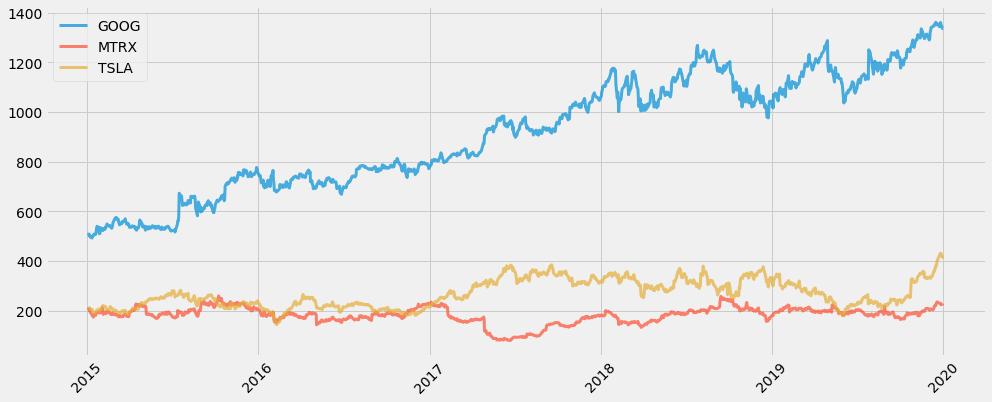

In [22]:
plot_series([goog.Close, mtrx.Close*10, tsla.Close], ['GOOG', 'MTRX', 'TSLA'], lw = 3)

## Analyze daily returns

In [33]:
goog_cl = goog.Close
tsla_cl = tsla.Close
mtrx_cl = mtrx.Close

closes = [goog_cl, tsla_cl, mtrx_cl]

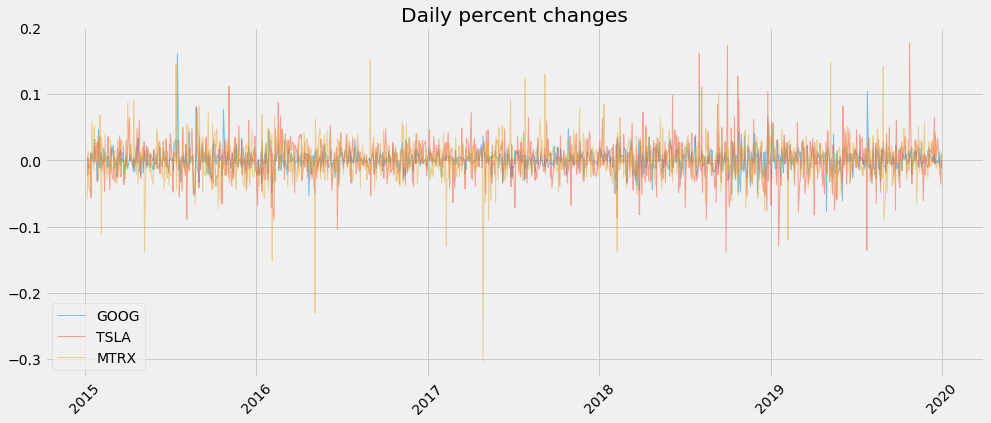

In [40]:
plot_series([x.pct_change() for x in closes], ['GOOG', 'TSLA', 'MTRX'], 
            title = f'Daily percent changes', 
            lw = 1, alpha = .5)

* ### Histograms of returns

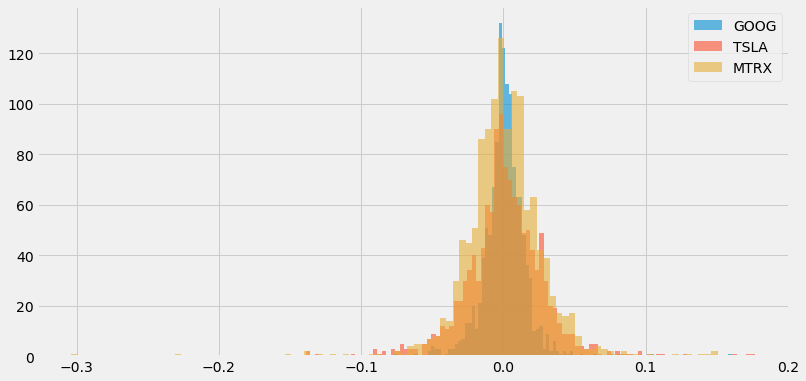

In [52]:
plt.figure(figsize = (12, 6))

for i, label in zip([x.pct_change() for x in closes], ['GOOG', 'TSLA', 'MTRX']):
    plt.hist(i, label = label, alpha = .6, bins = 100)

plt.legend()
plt.show()

It looks like Google is the most stable stock here. 
Tesla presents slightly bigger volitality (higher SD).
McKinsey seems to be even more volatile.

* ### Returns boxplots

In [71]:
# Build a dataframe
all_rets = pd.DataFrame({i:x.pct_change() for i, x in zip([1,2,3], closes)})
all_rets.columns = ['GOOG', 'TSLA', 'MTRX']

In [73]:
# Sanity check
all_rets.head()

,GOOG,TSLA,MTRX
Date,,,
2015-01-05,NaN,NaN,NaN
2015-01-06,-0.023177,0.005664,-0.058603
2015-01-07,-0.001713,-0.001562,-0.012948
2015-01-08,0.003153,-0.001564,0.014127
2015-01-09,-0.012951,-0.018802,-0.041791


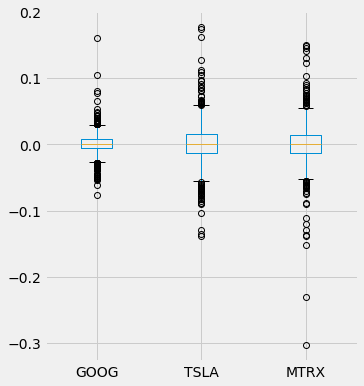

In [84]:
all_rets.plot(kind = 'box', figsize = (5, 6))
plt.show()

* ### Scatter matrix

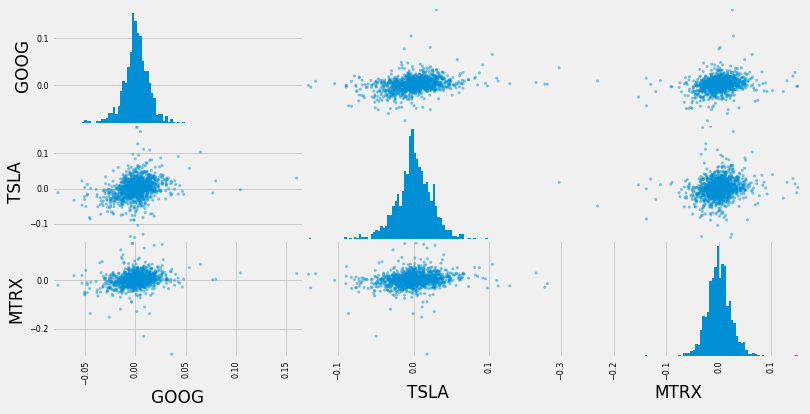

In [89]:
pd.plotting.scatter_matrix(all_rets, figsize = (12, 6), hist_kwds = {'bins': 100})
plt.show()

## Cumulative returns
<br>

Cumulative daily return can be computed using the following formula:

<br>

$$\large i_t = (1 + r_t) * i_{t-1}$$

<br>

where $i_t$ is a cumulative daily return at time $t$, $r_t$ is a percent change at $t-1$ and $i_{t-1}$ is a cumulative return at $t-1$.

In [45]:
# Get cumulative return
def get_cumret(x):
    return (1 + x.pct_change()).cumprod()

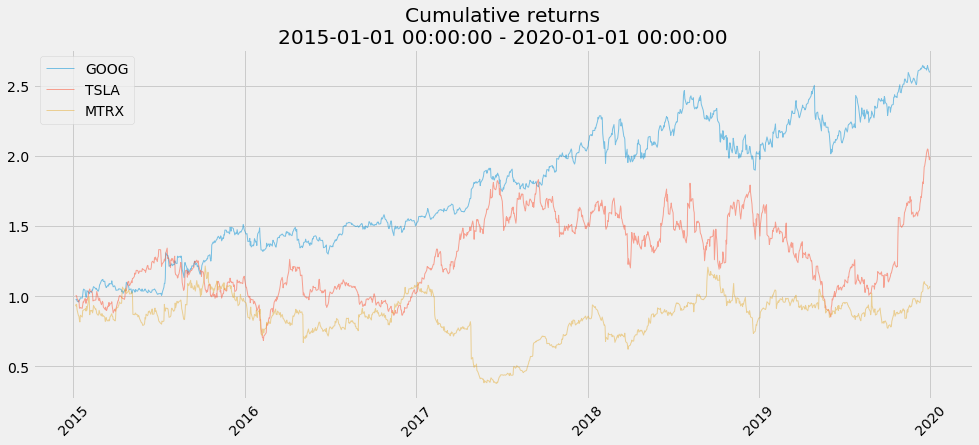

In [57]:
plot_series([get_cumret(x) for x in closes], ['GOOG', 'TSLA', 'MTRX'], 
            title = f'Cumulative returns\n{start} - {end}', 
            lw = 1, alpha = .5)